In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [53]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# Load the dataset
data = 'Hello haris how are you and how you doing'

In [15]:
corpus=data.lower().split('\n')
print(corpus)

['hello haris how are you and how you doing']


In [16]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words=len(tokenizer.word_index)+1
print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'how': 1, 'you': 2, 'hello': 3, 'haris': 4, 'are': 5, 'and': 6, 'doing': 7}
total words: 8


In [17]:
input_sequences=[]

for line in corpus:
    print(line)
    token_list=tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1, len(token_list)):
# Generate the subphrase
        n_gram_sequence = token_list[:i+1]
    # Append the subphrase to the sequences list
        input_sequences.append(n_gram_sequence)

hello haris how are you and how you doing
[3, 4, 1, 5, 2, 6, 1, 2, 7]


In [18]:
# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)
print(f'shape of features {xs.shape}')
print(f'shape of labels {ys.shape}')

sample sentence: ['hello', 'haris', 'how', 'are', 'you', 'and', 'how', 'you', 'doing']
[3, 4, 1, 5, 2, 6, 1, 2, 7]
shape of features (8, 8)
shape of labels (8, 8)


In [10]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')
#Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [0 3 4 1 5 2 6 1]
decoded to text: ['hello haris how are you and how']
one-hot label: [0. 0. 1. 0. 0. 0. 0. 0.]
index of label: 2


In [43]:
# Build the model
model = tf.keras.Sequential([
          tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_len-1),
          tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
          tf.keras.layers.Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6, 64)             960       
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 15)                615       
                                                                 
Total params: 15,175
Trainable params: 15,175
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.7102 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 2.7052 - accuracy: 0.0000e+00
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 2.7003 - accuracy: 0.1429
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6954 - accuracy: 0.2857
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 2.6905 - accuracy: 0.2857
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6856 - accuracy: 0.2857
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 2.6807 - accuracy: 0.2857
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 2.6757 - accuracy: 0.2857
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 2.6706 - accuracy: 0.2857
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 2.6655 - accuracy: 0.2857
Epoch 11/500
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 1.0000
Epoch 168/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1478 - accuracy: 1.0000
Epoch 169/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 1.0000
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 1.0000
Epoch 171/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1387 - accuracy: 1.0000
Epoch 172/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1359 - accuracy: 1.0000
Epoch 173/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 1.0000
Epoch 174/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1305 - accuracy: 1.0000
Epoch 175/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1279 - accuracy: 1.0000
Epoch 176/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 1.0000
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 1.0000
Epoch 332/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 333/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 334/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 1.0000
Epoch 335/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 1.0000
Epoch 336/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 337/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 338/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 339/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 340/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 1.0000
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 1.0000


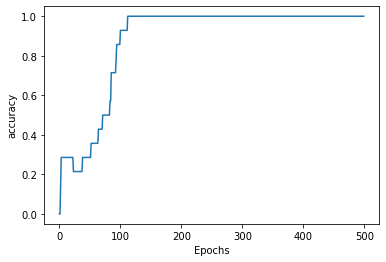

In [45]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [50]:
# Define seed text
seed_text = "research "

# Define total words to predict
next_words = 10

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

research  he is mechatronics engineer engineer engineer engineer engineer engineer engineer
